## Data Sources:

##### 1. SEntFiN 1.0: Entity-aware sentiment analysis for financial news
Ankur Sinha,Satishwar Kedas,Rishu Kumar,Pekka Malo

First published: 08 March 2022 https://doi.org/10.1002/asi.24634

Funding information: India Gold Policy Centre, Grant/Award Number: 9209100:1815012

##### 2. Stock Market TWEETS Data -Sentiment Analysis
***Acknowledgements:***
Citation Author(s): BrunoTaborda Instituto Universitário de Lisboa (ISCTE-IUL), Lisbon, Portugal & Instituto Universitário de Lisboa (ISCTE-IUL), ISTAR, Lisbon, Portugal & CISUC - Center for Informatics and Systems of the University of Coimbra, Coimbra, PortugalAnade AlmeidaInstituto Universitário de Lisboa (ISCTE-IUL), Lisbon, Portugal & Instituto Universitário de Lisboa (ISCTE-IUL), ISTAR, Lisbon, Portugal & CISUC - Center for Informatics and Systems of the University of Coimbra, Coimbra, PortugalJoséCarlos DiasInstituto Universitário de Lisboa (ISCTE-IUL), Lisbon, Portugal & Business Research Unit (BRU-IUL), Lisbon, Portugal Fernando BatistaInstituto Universitário de Lisboa (ISCTE-IUL), Lisbon, Portugal & INESC-ID, Lisbon, PortugalRicardoRibeiroInstituto Universitário de Lisboa (ISCTE-IUL), Lisbon, Portugal & INESC-ID, Lisbon, Portugal.

##### 3. FinancialPhraseBank-v1.0
***Acknowledgements:***
Malo, P., Sinha, A., Takala, P., Korhonen, P. and Wallenius, J. (2013): “Good debt or bad debt: Detecting semantic orientations in economic texts.” Journal of the American Society for Information Science and Technology(Year 2014; Volume 65). (https://www.researchgate.net/publication/251231364_FinancialPhraseBank-v10)

## Importing necessary libraries

In [1]:
import re
import pandas as pd
import numpy as np
import json

## Reading the datasets

### SEntFiN 1.0

In [157]:
snt_fn = pd.read_csv('C:/Users/Ujjwa/OneDrive/Desktop/Train Data/Aspect based Sentiment Analysis for Financial News/SEntFiN-v1.1.csv')

### Stock Market TWEETS Data -Sentiment Analysis

In [255]:
sm_twt = pd.read_csv('C:/Users/Ujjwa/OneDrive/Desktop/Train Data/Stock Market TWEETS Data-NLP-2021/tweets/tweets_labelled_09042020_16072020.csv',
                    sep=';')

### FinancialPhraseBank-v1.0

In [284]:
colnames=['text','sentiment'] 
text1 = pd.read_csv(r'C:\Users\Ujjwa\OneDrive\Desktop\Train Data\FinancialPhraseBank-v1.0\FinancialPhraseBank-v1.0\Sentences_AllAgree.txt',
                    sep='\n', 
                    encoding= 'ISO-8859-1',
                    names= colnames,
                    header=None)
text2 = pd.read_csv(r'C:\Users\Ujjwa\OneDrive\Desktop\Train Data\FinancialPhraseBank-v1.0\FinancialPhraseBank-v1.0\Sentences_75Agree.txt',sep='\n', encoding= 'ISO-8859-1',names= colnames,header=None)
text3 = pd.read_csv(r'C:\Users\Ujjwa\OneDrive\Desktop\Train Data\FinancialPhraseBank-v1.0\FinancialPhraseBank-v1.0\Sentences_66Agree.txt',sep='\n', encoding= 'ISO-8859-1',names= colnames,header=None)

## Preprocessing

#### SEntFiN 1.0

In [160]:
snt_fn["Decisions"] = snt_fn["Decisions"].str.replace("[^A-Za-z]"," ")

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_2768/824568964.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  snt_fn["Decisions"] = snt_fn["Decisions"].str.replace("[^A-Za-z]"," ")


In [161]:
sntmt= ["negative","positive","neutral"]
snt_fn['sentiment'] = [' '.join(ch for ch in i.split() if ch in sntmt) for i in snt_fn['Decisions']]
#snt_fn.sentiment.nunique()

44

In [162]:
gd_f = pd.get_dummies(pd.DataFrame(snt_fn['sentiment'].str.split().tolist()).stack()).sum(level=0) ## Correct one

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_2768/3018929471.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  gd_f = pd.get_dummies(pd.DataFrame(snt_fn['sentiment'].str.split().tolist()).stack()).sum(level=0) ## Correct one


In [164]:
snt_fn = pd.concat([snt_fn, gd_f] , axis = 1)

,S No.,Title,Decisions,Words,sentiment,negative,neutral,positive
0,1,SpiceJet to issue 6.4 crore warrants to promoters,SpiceJet neutral,8,neutral,0,1,0
1,2,MMTC Q2 net loss at Rs 10.4 crore,MMTC neutral,8,neutral,0,1,0
2,3,"Mid-cap funds can deliver more, stay put: Experts",Mid cap funds positive,8,positive,0,0,1
3,4,Mid caps now turn into market darlings,Mid caps positive,7,positive,0,0,1
4,5,"Market seeing patience, if not conviction: Pra...",Market neutral,8,neutral,0,1,0
...,...,...,...,...,...,...,...,...
10748,10749,"Negative on Chambal, Advanta: Mitesh Thacker",Chambal negative Advanta negative,6,negative negative,2,0,0
10749,10750,"Small, Mid-cap stocks may emerge outperformers",Small positive Mid cap stocks posit...,6,positive positive,0,0,2
10750,10751,Rupee slips against US dollar,Rupee negative US dollar neutral,5,negative neutral,1,1,0
10751,10752,Rupee weak against US dollar,Rupee negative US dollar neutral,5,negative neutral,1,1,0


In [168]:
snt_fn['sentiment_value'] = pd.to_numeric(snt_fn['positive']) - pd.to_numeric(snt_fn['negative'])

In [203]:
snt_fn['score'] = np.where(snt_fn['sentiment_value'] >= 30 , -1 , snt_fn['sentiment_value'])

In [207]:
snt_fn['score'] = np.where(snt_fn['score'] >= 1 , 1 , snt_fn['score'])

In [218]:
snt_fn.drop(snt_fn.index[(snt_fn['negative'] == 1) & (snt_fn['positive'] == 1) ], inplace = True)
snt_fn.drop(snt_fn.index[(snt_fn['negative'] == 2) & (snt_fn['positive'] == 2) ], inplace = True)

In [232]:
snt_fn.reset_index(inplace=True)

In [220]:
snt_fn.score.value_counts()

 1    4029
 0    3443
-1    3156
Name: score, dtype: int64

In [233]:
df1 = snt_fn[['Title','score']]

In [234]:
df1.rename(columns={'Title' : 'text'}, inplace = True)

C:\Users\Ujjwa\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Stock Market TWEETS Data -Sentiment Analysis

In [256]:
sm_twt.dropna(inplace=True)

In [242]:
sm_twt.sentiment.value_counts()

positive    528
neutral     424
negative    348
Name: sentiment, dtype: int64

In [257]:
sm_twt['score'] = sm_twt['sentiment'].map({'negative':-1.0, 
                                       'neutral':0.0, 
                                       'positive': 1.0})

In [259]:
df2 = sm_twt[['text','score']]

### FinancialPhraseBank-v1.0

In [285]:
def sentiment_col(df):
    sentiment = []
    for i in range(0,len(df)):
        sentiment.append(re.findall("@([a-zA-Z0-9]{1,15})", df.iloc[i][0])[0])
    df["sentiment"] = sentiment
    return df

In [286]:
tdf1 = sentiment_col(text1)
tdf2 = sentiment_col(text2)
tdf3 = sentiment_col(text3)
tdf = pd.concat([tdf1,tdf2,tdf3],axis = 0)

In [294]:
tdf.reset_index(inplace=True)

In [296]:
def mention_remove(text):
    text= re.sub('@[A-Za-z0-9]+',' ',text ) #removing mentions
    return text

In [297]:
tdf['text'] = tdf['text'].apply(mention_remove)

In [301]:
tdf['score'] = tdf['sentiment'].map({'negative':-1.0, 
                                       'neutral':0.0, 
                                       'positive': 1.0})

In [303]:
df3 = tdf[['text','score']]

In [319]:
df = pd.concat([df1,df2,df3],axis = 0,ignore_index = True)

### Final Dataframe

In [320]:
df

,text,score
0,SpiceJet to issue 6.4 crore warrants to promoters,0.0
1,MMTC Q2 net loss at Rs 10.4 crore,0.0
2,"Mid-cap funds can deliver more, stay put: Experts",1.0
3,Mid caps now turn into market darlings,1.0
4,"Market seeing patience, if not conviction: Pra...",0.0
...,...,...
21857,HELSINKI Thomson Financial - Shares in Cargote...,-1.0
21858,LONDON MarketWatch -- Share prices ended lower...,-1.0
21859,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0.0
21860,Operating profit fell to EUR 35.4 mn from EUR ...,-1.0


In [321]:
df.to_csv('final_df.csv')

## Data Cleaning

In [325]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(string))


def Clean_text(text):
    text= re.sub('@[A-Za-z0-9]+','',text ) #removing mentions
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) # Removing non letters
    text= re.sub("#",'',text) #removing #
    text= re.sub('RT[\s]+',' ',text) # removing Retexts
    text= re.sub('https?:\/\/\S+','',text) #removing links
    text= re.sub("[+%|):'@(€¥£—•;=*]"," ",text)
    text= re.sub(r'[^\x00-\x7F]+',' ', text)
    text= re.sub('^\d+\s|\s\d+\s|\s\d+$',' ', text)
    text= text.lower()
    return text


In [326]:
df['text'] = df["text"].apply(remove_emoji)
df['text'] = df["text"].apply(Clean_text)

In [333]:
df.to_csv('cleaned_df.csv')

In [329]:
#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import ticker
%matplotlib inline
import seaborn as sns

<AxesSubplot:title={'center':'different catagories'}, ylabel='score'>

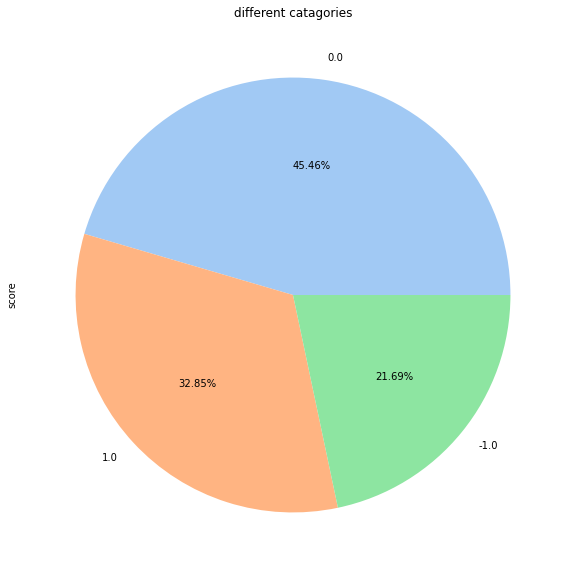

In [332]:
color = sns.color_palette('pastel')[0:df.score.nunique()]
df['score'].value_counts().plot.pie(figsize =(18,10) , 
                                           autopct='%.2f%%', 
                                           title = 'different catagories',
                                           colors =color)

The train dataset contains 32.85% Positive data ; 21.69% negative data & 45.46% neutral data